In [4]:
!pip install nltk
!pip install contractions
!pip install beautifulsoup4
!pip install xgboost

In [11]:
# Step 1 and 2: Load and preprocess the dataset
import pandas as pd
import re
import string
import nltk
import contractions
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup

nltk.download('stopwords')
nltk.download('wordnet')

# Load dataset
df = pd.read_csv('./IMDB-Dataset.csv')

# Remove duplicate rows
df = df.drop_duplicates()

stop = set(stopwords.words('english'))

# Expanding contractions
def expand_contractions(text):
    return contractions.fix(text)

# Function to clean data
def preprocess_text(text):
    wl = WordNetLemmatizer()

def preprocess_text(text):
    # Loại bỏ HTML tags
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()

    # Chuyển đổi về chữ thường
    text = text.lower()

    # Mở rộng các từ viết tắt
    text = expand_contractions(text)

    # Loại bỏ URLs
    text = re.sub(r'http\S+', '', text)

    # Loại bỏ số và dấu câu, nhưng giữ lại dấu '
    text = re.sub(r'[^a-zA-Z\']', ' ', text)

    # Loại bỏ khoảng trắng thừa
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenize
    tokens = text.split()

    # Loại bỏ stop words
    tokens = [token for token in tokens if token not in stop]

    # Ghép lại thành câu
    text = ' '.join(tokens)

    return text

# Áp dụng tiền xử lý
df['review'] = df['review'].apply(preprocess_text)

# Kiểm tra xem có bản ghi nào bị rỗng sau khi tiền xử lý
empty_reviews = df[df['review'].str.strip() == '']
print(f"Số lượng bản ghi rỗng sau tiền xử lý: {len(empty_reviews)}")

# Loại bỏ các bản ghi rỗng (nếu có)
df = df[df['review'].str.strip() != '']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-11-c208a3e1e776>:32: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


Số lượng bản ghi rỗng sau tiền xử lý: 0


In [26]:

# Load dataset
df = pd.read_csv('./IMDB-Dataset.csv')


stop = set(stopwords.words('english'))

# Đếm số lượng mẫu trùng lặp
duplicate_count = len(df) - len(df.drop_duplicates())
print(f"Số lượng mẫu trùng lặp: {duplicate_count}")

Số lượng mẫu trùng lặp: 418


Số lượng mẫu trùng lặp: 6
Kích thước từ điển sau bước tiền xử lý: 120851 từ


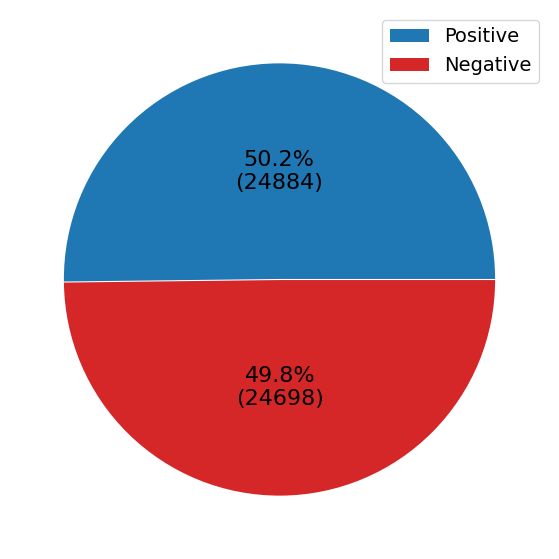

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


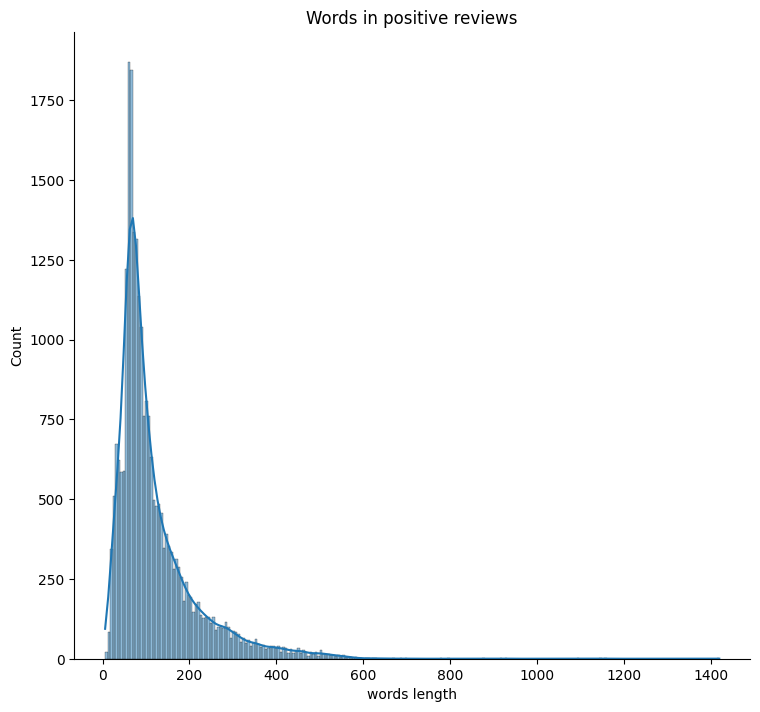

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


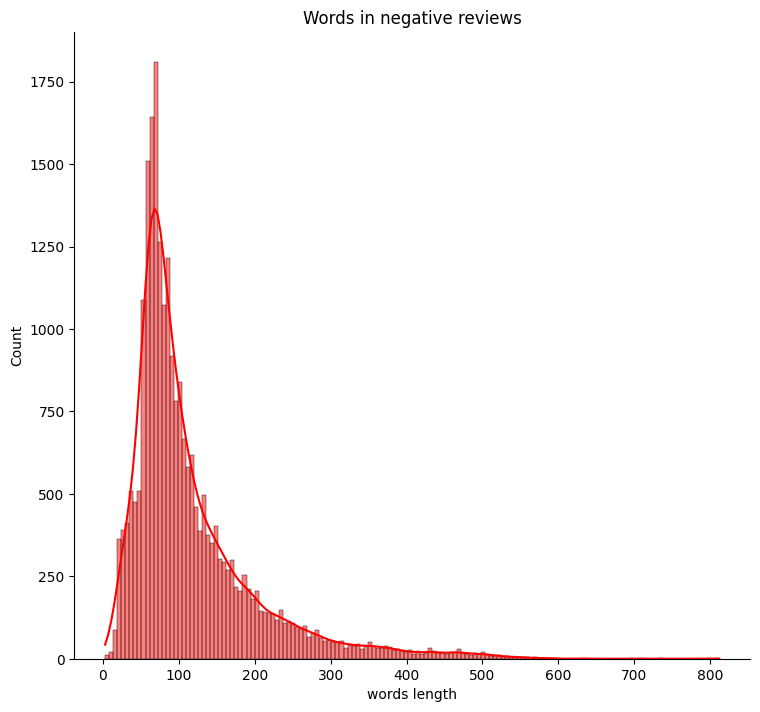

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


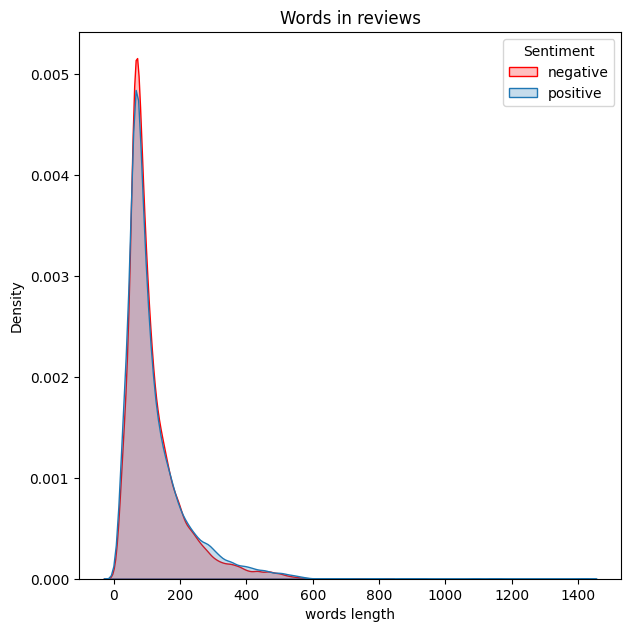

In [12]:
# Step 3: Data Analysis
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100. * np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

freq_pos = len(df[df['sentiment'] == 'positive'])
freq_neg = len(df[df['sentiment'] == 'negative'])

data = [freq_pos, freq_neg]

labels = ['positive', 'negative']
# Create pie chart
pie, ax = plt.subplots(figsize=[11, 7])
plt.pie(x=data, autopct=lambda pct: func(pct, data), explode=[0.0025]*2, pctdistance=0.5, colors=[sns.color_palette()[0], 'tab:red'], textprops={'fontsize': 16})
labels = [r'Positive', r'Negative']
plt.legend(labels, loc="best", prop={'size': 14})
pie.savefig("PieChart.png")
plt.show()

# Word length analysis
words_len = df['review'].str.split().map(lambda x: len(x))
df_temp = df.copy()
df_temp['words length'] = words_len

hist_positive = sns.displot(
    data=df_temp[df_temp['sentiment'] == 'positive'],
    x="words length", hue="sentiment", kde=True, height=7, aspect=1.1, legend=False
).set(title='Words in positive reviews')
plt.show(hist_positive)

hist_negative = sns.displot(
    data=df_temp[df_temp['sentiment'] == 'negative'],
    x="words length", hue="sentiment", kde=True, height=7, aspect=1.1, legend=False, palette=['red']
).set(title='Words in negative reviews')
plt.show(hist_negative)

plt.figure(figsize=(7, 7.1))
kernel_distribution_number_words_plot = sns.kdeplot(
    data=df_temp, x="words length", hue="sentiment", fill=True, palette=[sns.color_palette()[0], 'red']
).set(title='Words in reviews')
plt.legend(title='Sentiment', labels=['negative', 'positive'])
plt.show(kernel_distribution_number_words_plot)

In [16]:
# Step 4: Split train and test sets
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

label_encode = LabelEncoder()
y_data = label_encode.fit_transform(df['sentiment'])
x_data = df['review']

x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.2, random_state=42
)

# Step 5: Vectorize text
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
tfidf_vectorizer.fit(x_train, y_train)

x_train_encoded = tfidf_vectorizer.transform(x_train)
x_test_encoded = tfidf_vectorizer.transform(x_test)


In [17]:
# Step 6: Train and evaluate models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Decision Tree
dt_classifier = DecisionTreeClassifier(
    criterion='entropy',
    random_state=42
)
dt_classifier.fit(x_train_encoded, y_train)
y_pred_dt = dt_classifier.predict(x_test_encoded)
dt_accuracy = accuracy_score(y_pred_dt, y_test)
print(f"Decision Tree Accuracy: {dt_accuracy}")

# Random Forest
rf_classifier = RandomForestClassifier(
    random_state=42
)
rf_classifier.fit(x_train_encoded, y_train)
y_pred_rf = rf_classifier.predict(x_test_encoded)
rf_accuracy = accuracy_score(y_pred_rf, y_test)
print(f"Random Forest Accuracy: {rf_accuracy}")

Decision Tree Accuracy: 0.7096904305737622
Random Forest Accuracy: 0.8452152868811132


In [20]:
# (Các phần import và tiền xử lý giữ nguyên)

# Đếm số lượng mẫu trùng lặp
duplicate_count = len(df) - len(df.drop_duplicates())
print(f"Số lượng mẫu trùng lặp: {duplicate_count}")

# Loại bỏ các mẫu trùng lặp
df = df.drop_duplicates()

# Tiền xử lý dữ liệu
df['review'] = df['review'].apply(preprocess_text)

# Đếm kích thước từ điển sau bước tiền xử lý
vocabulary = set()
for review in df['review']:
    vocabulary.update(review.split())
vocabulary_size = len(vocabulary)
print(f"Kích thước từ điển sau bước tiền xử lý: {vocabulary_size} từ")

# (Phần còn lại của mã giữ nguyên)

# Step 5: Vectorize text
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
tfidf_vectorizer.fit(x_train)

# Đếm số lượng từ thực tế được sử dụng trong TF-IDF
actual_vocabulary_size = len(tfidf_vectorizer.vocabulary_)
print(f"Số lượng từ thực tế được sử dụng trong TF-IDF: {actual_vocabulary_size}")

# (Phần còn lại của mã giữ nguyên)

Số lượng từ thực tế được sử dụng trong TF-IDF: 10000
